# Group project
## Group number:9
## Project- Credit Card Fraud Detection
## CMPE-255


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

### Data loading and data analysis
#####  Kaggle dataset is used for this project.
##### https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [116]:
cc_data = pd.read_csv('creditcard.csv')
# Display the first 3 rows
print(cc_data.head(3))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


In [118]:
#print the last three rows
print(cc_data.tail(3))

            Time        V1        V2        V3        V4        V5        V6  \
284804  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788.0 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0  

[3 rows x 31 columns]


In [120]:
# Check the number of rows and cloumns in the dataset
print(f"Number of rows: {cc_data.shape[0]}")
print(f"Number of columns: {cc_data.shape[1]}")

Number of rows: 284807
Number of columns: 31


In [122]:
print("Columns info:",cc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Counting the number of duplicate rows and checking for missing values
##### Number of duplicate rows is 1081
##### There are no missing values

In [125]:
print("Duplicate rows:", cc_data.duplicated().sum())
print("Missing values:", cc_data.isnull().sum())

Duplicate rows: 1081
Missing values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### Counting the number of fraud and non fraud transactions
#### 0 is non fraud transactions and 1 is the fraud transactions
#### The dataset consists of 284315 non fraud transaction and 492 fraud transactions (imbalanced dataset)

In [128]:
print(cc_data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [155]:
# Comparing the mean of fraud and non-fraud transactions
print(cc_data.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

#### Store fraud transactions in a varaible named fraud and non fraud transactions in a varialbe named non fraud

In [158]:
fraud = cc_data[cc_data.Class== 1]
non_fraud = cc_data[cc_data.Class == 0]

print(fraud.shape)
print(non_fraud.shape)

(492, 31)
(284315, 31)


#### Statistics summary and Visualizion of the data distribution

In [137]:
print(cc_data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [145]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [147]:
print(non_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


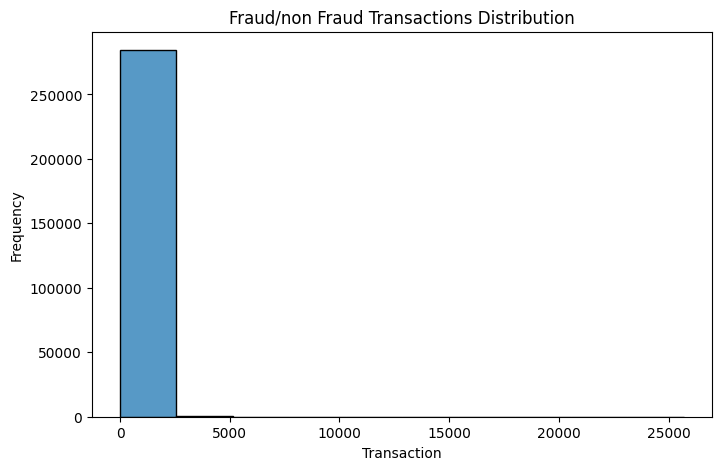

In [143]:
# Histogram of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(cc_data['Amount'], bins=10)
plt.title("Fraud/non Fraud Transactions Distribution")
plt.xlabel("Transaction")
plt.ylabel("Frequency")
plt.show()

#### Handling the imbalanced dataset before building the model
#### by undersampling the majority class and randomly taking a sample of 492 non-fraud transactions 

In [165]:
non_fraud = non_fraud.sample(n=492)

print(non_fraud.shape)
print(fraud.shape)

(492, 31)
(492, 31)


#### Create new balanced dataset 
#### the new balanced dataset has 984 rows (492 fraud + 492 non fraud)

In [185]:
new_balanced_dataset = pd.concat([non_fraud, fraud], axis=0)

print(new_balanced_dataset.shape)

(984, 31)


#### Compare the mean values of fraud and sampling non fraud transactions
#### The mean values for the new dataset has to be close to the mean values of the original dataset

In [188]:
print(cc_data.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

##### Before building and training the model, we will split the new balanced dataset into train and test. 
##### X will be all the features from the new dataset and Y will be the target (Class)

In [192]:
print(new_balanced_dataset.head(3))

            Time        V1        V2        V3        V4        V5        V6  \
8372     11200.0  1.242580  0.425855  0.808064  0.893817 -0.501342 -1.116631   
235675  148492.0 -3.964798 -4.408869  0.930038 -1.025931  1.767508 -1.377735   
128356   78684.0  1.284134  0.189098  0.017330  0.385337  0.175022 -0.087054   

              V7        V8        V9  ...       V21       V22       V23  \
8372    0.023051 -0.347145  1.200396  ... -0.378846 -0.811931  0.180950   
235675  0.512905  0.135778  0.418750  ...  0.179930 -1.437087  1.839756   
128356  0.029025 -0.036464  0.078071  ... -0.231695 -0.614680  0.007544   

             V24       V25       V26       V27       V28  Amount  Class  
8372    0.664745  0.175013  0.033448 -0.050558  0.017286    0.89      0  
235675  0.535045  0.684586  0.194086 -0.354954  0.159783  593.20      0  
128356 -0.760959  0.357259  0.255326 -0.019657  0.003062    1.30      0  

[3 rows x 31 columns]


In [198]:
X = new_balanced_dataset.drop(columns='Class', axis=1)
Y = new_balanced_dataset['Class']

print("X:",X)
print("Y:",Y)

X:             Time        V1        V2        V3        V4        V5        V6  \
8372     11200.0  1.242580  0.425855  0.808064  0.893817 -0.501342 -1.116631   
235675  148492.0 -3.964798 -4.408869  0.930038 -1.025931  1.767508 -1.377735   
128356   78684.0  1.284134  0.189098  0.017330  0.385337  0.175022 -0.087054   
15013    26343.0  1.246575  0.249047 -0.124586  0.467990 -0.017383 -1.030639   
264843  161619.0 -1.865601 -0.379946 -0.012638 -1.156871  1.328293 -1.357724   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9

In [202]:
RANDOM_SEED = 42

In [210]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=RANDOM_SEED)

In [212]:
print("X_train:",X_train.shape)
print("X_validation:",X_validation.shape)

X_train: (787, 30)
X_validation: (197, 30)


In [214]:
print("Y_train:", Y_train)
print("Y_validation:", Y_validation)

Y_train: 139743    0
172982    0
56703     1
150684    1
6882      1
         ..
39183     1
225056    0
143335    1
98540     0
17317     1
Name: Class, Length: 787, dtype: int64
Y_validation: 230076    1
262826    1
192743    0
30314     1
176242    0
         ..
83522     0
6472      1
138729    0
52466     1
274498    0
Name: Class, Length: 197, dtype: int64


In [ ]:

# Step 3: Train Logistic Regression and Decision Tree models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train-test split (if not done yet)
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train models
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Step 4: Evaluate models
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, lr_model.predict(X_test)))

print("Decision Tree Report:")
print(classification_report(y_test, dt_model.predict(X_test)))
